# Description
> This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.

> The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

# Table of Content

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# In case we want to ignore the warning parts @-@
import warnings
warnings.filterwarnings("ignore")

# Discovery

## Outlook

In [2]:
raw = pd.read_csv('./Data/vgsales.csv')

In [3]:
raw.sample(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10637,10639,International Superstar Soccer 64 (weekly JP s...,N64,1997.0,Sports,Konami Digital Entertainment,0.00,0.00,0.05,0.05,0.10
293,294,Namco Museum Vol.3,PS,1996.0,Misc,Sony Computer Entertainment,2.28,1.55,0.16,0.06,4.05
5421,5423,The Sims 3: Town Life Stuff,PC,2011.0,Simulation,Electronic Arts,0.11,0.17,0.00,0.05,0.34


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## NaN value

In [5]:
# Percentuale NaN presenti nel dataset
t = raw.shape
perc_NaN = ((raw.isna().sum().sum())/(t[0]*t[1])*100).round(2)
perc_NaN

0.18

In [6]:
# Bar Chart Visualizing Missing values
data_info= pd.DataFrame({'Attributes':raw.columns})
data_info['Type']= data_info['Attributes'].apply(lambda x: raw[x].dtypes)
data_info['Count_NA']= data_info['Attributes'].apply(lambda x: raw[x].isna().sum())
data_info['Percentage_NA']= data_info['Attributes'].apply(lambda x: raw[x].isna().mean())
data_info

,Attributes,Type,Count_NA,Percentage_NA
0,Rank,int64,0,0.000000
1,Name,object,0,0.000000
2,Platform,object,0,0.000000
3,Year,float64,271,0.016327
4,Genre,object,0,0.000000
5,Publisher,object,58,0.003494
6,NA_Sales,float64,0,0.000000
7,EU_Sales,float64,0,0.000000
8,JP_Sales,float64,0,0.000000
9,Other_Sales,float64,0,0.000000


# Data Exploration and Selection

# Data Cleaning

In [7]:
# Drop any duplicate rows
raw.drop_duplicates(inplace=True)

Ho controllato se le vendite fossero tutte maggiori di zero

In [8]:
my_list = raw.columns
for i in my_list[6:]:
    check = raw.loc[(raw['NA_Sales'].astype(int)<0)]
    check_columns = len(check)
    if check_columns != 0:
        print(f'Nella colonna {i} sono presenti dei valori non validi')

Il dataset è complessivamente pulito ed utilizzabile

# Data Visualization 

## Overal Graph

Overall Platform

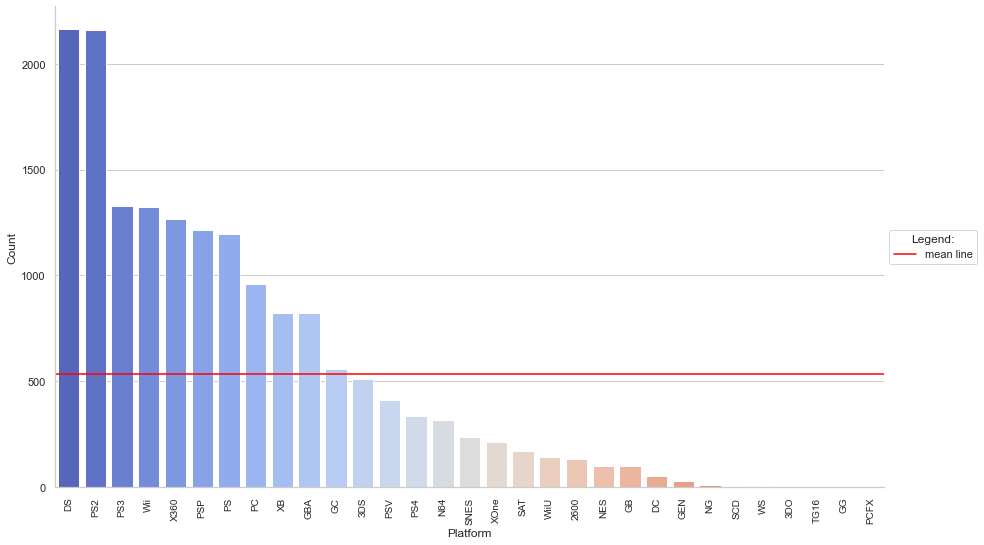

In [17]:
sns.set_theme(style="whitegrid")
sns.catplot(x='Platform',
            palette='coolwarm',
            order=raw.Platform.value_counts().index,
            kind='count', data=raw)

# Add Orizontal line
_ = raw.Platform.value_counts()
mean_line = _.mean().round(2)
plt.axhline(y=mean_line, xmin=0.0, xmax=1.0, color='red')

# Add legend
legend=['mean line']
plt.legend(legend, title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

# Add labels
plt.xlabel("Platform")
plt.xticks(rotation=90, fontsize = 10)
plt.ylabel("Count")

plt.gcf().set_size_inches(15, 8)

# plt.savefig("./Img/Overall Platform.png")

Overall Year

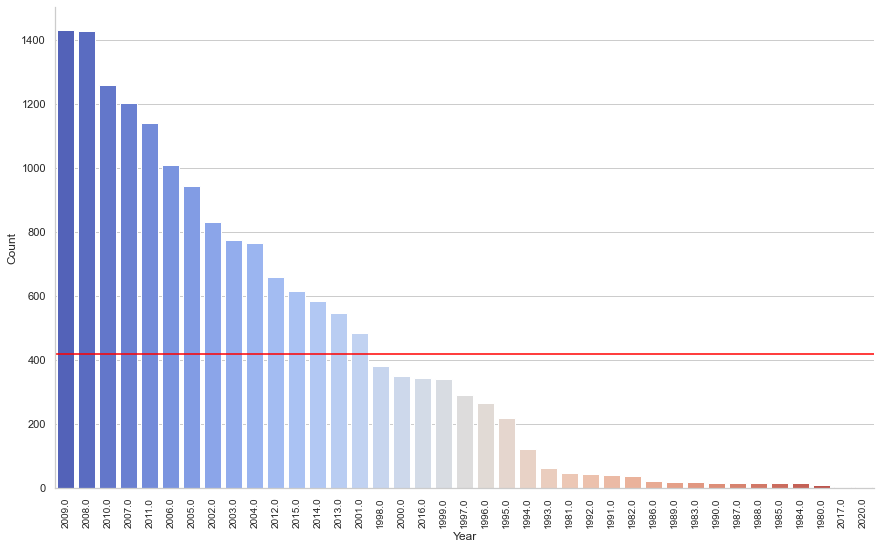

In [10]:
sns.set_theme(style="whitegrid")

sns.catplot(x='Year',
            palette='coolwarm',
            order=raw.Year.value_counts().index,
            kind='count', data=raw)

# Add Orizontal line
_ = raw.Year.value_counts()
mean_line = _.mean().round(2)
plt.axhline(y=mean_line, xmin=0.0, xmax=1.0, color='red')

# Add labels
plt.xlabel("Year")
plt.xticks(rotation=90, fontsize = 10)
plt.ylabel("Count")

plt.gcf().set_size_inches(15, 8)

# plt.savefig("./Img/Overall Year.png", dpi=1200)

Overall Genre

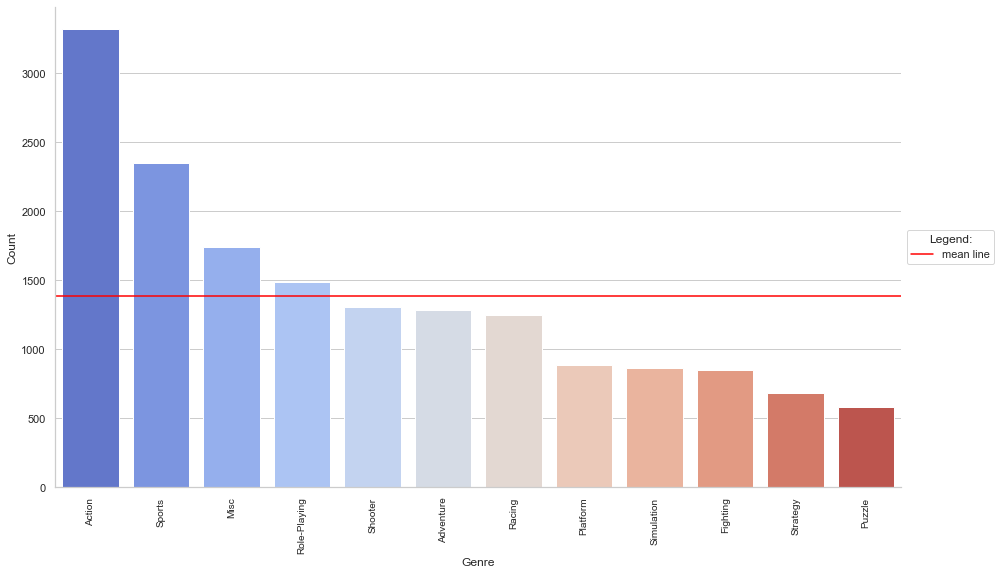

In [11]:
sns.set_theme(style="whitegrid")

sns.catplot(x='Genre',
            palette='coolwarm',
            order=raw.Genre.value_counts().index,
            kind='count', data=raw)

# Add Orizontal line
_ = raw.Genre.value_counts()
mean_line = _.mean().round(2)
plt.axhline(y=mean_line, xmin=0.0, xmax=1.0, color='red')


# Add labels
plt.xlabel("Genre")
plt.xticks(rotation=90, fontsize = 10)
plt.ylabel("Count")

# Add legend
legend=['mean line']
plt.legend(legend, title ="Legend:",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.gcf().set_size_inches(15, 8)

# plt.savefig("./Img/Overall Genre.png", dpi=1200)

In [12]:
#For Sales Analyst
import plotly.express as px

## Top 10 Publishers in Global Sales

In [35]:
topp = raw.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
topp1 = topp.sort_values('Global_Sales', ascending=False).head(10)

fig = px.bar(topp1, x='Global_Sales', y='Publisher', title= 'Top 10 Publishers in Global Sales',
             color = 'Publisher', labels={"Global_Sales": "Sales revenue in millions(USD)"})
fig.update_layout(height=750,width=1200, showlegend=False)
fig.update_traces(marker_color='darkcyan')
fig.show()

fig.write_image("./Img/Top 10 Publishers in global Sales.png")

## Top 10 Publishers in North America

In [26]:
topp = raw.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
topp2 = topp.sort_values('NA_Sales', ascending=False).head(10)

fig = px.bar(topp2, x='NA_Sales', y='Publisher', title= 'Top 10 Publishers in North America', color = 'Publisher', labels={"NA Sales": "Sales revenue in millions(USD)"})
fig.update_layout(height=750,width=1200, showlegend=False)
fig.update_traces(marker_color='darkcyan')
fig.show()

# fig.write_image("./Img/Top 10 Publishers in North America.png")

## Top 10 Publishers in Europe

In [27]:
topp = raw.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
topp2 = topp.sort_values('EU_Sales', ascending=False).head(10)

fig = px.bar(topp2, x='EU_Sales', y='Publisher', title= 'Top 10 Publishers in Europe', color = 'Publisher', labels={"EU Sales": "Sales revenue in millions(USD)"})
fig.update_layout(height=750,width=1200, showlegend=False)
fig.update_traces(marker_color='darkcyan')
fig.show()

# fig.write_image("./Img/Top 10 Publishers in Europe.png")

## Top 10 Publishers in JP

In [31]:
topp = raw.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
topp2 = topp.sort_values('JP_Sales', ascending=False).head(10)

fig = px.bar(topp2, x='JP_Sales', y='Publisher', title= 'Top 10 Publishers in JP', color = 'Publisher', labels={"JP Sales": "Sales revenue in millions(USD)"})
fig.update_layout(height=750,width=1200, showlegend=False)
fig.update_traces(marker_color='darkcyan')
fig.show()

# fig.write_image("./Img/Top 10 Publishers in JP.png")

## Top 10 Publishers in Other

In [32]:
topp = raw.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum().reset_index()
topp2 = topp.sort_values('Other_Sales', ascending=False).head(10)

fig = px.bar(topp2, x='Other_Sales', y='Publisher', title= 'Top 10 Publishers in Other', color = 'Publisher', labels={"Other Sales": "Sales revenue in millions(USD)"})
fig.update_layout(height=750,width=1200, showlegend=False)
fig.update_traces(marker_color='darkcyan')
fig.show()

# fig.write_image("./Img/Top 10 Publishers in Other.png")

## Top genres in sales

In [34]:
topg = raw[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(['Genre'], as_index=False).sum().sort_values(['Global_Sales'], ascending=False)

fig = px.bar(topg, x='Global_Sales', y='Genre', title= 'Top genres in sales', color = 'Genre', labels={"Global_Sales": "Sales revenue in millions(USD)"})
fig.update_layout(height=750,width=1200, showlegend=False)
fig.update_traces(marker_color='darkcyan')
fig.show()

# fig.write_image("./Img/Top genres in sales.png")

## Platform Sales globally

In [21]:
plat = raw[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby(['Platform'], as_index=False).sum().sort_values(['Global_Sales'], ascending=False)

fig = px.bar(plat, x='Platform',y='Global_Sales', title= 'Platform Sales globally', color= "Platform", labels={"Global_Sales": "Sales revenue in millions(USD)"})
fig.update_traces(marker_color='darkcyan', showlegend=False)
fig.show()

# fig.write_image("./Img/Platform Sales globally.png")